# Preprocesado
Comenzamos cargando las librerías necesarias

TODOs: 
- Average hourly consumption (from 0 to 23)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.signal as sp
from sklearn.neural_network import MLPRegressor

Cargamos el dataset en memoria, se trata de un txt que utiliza ; como separador.

In [4]:
# Definimos una función para la conversión de tipos
def convert_dtype_to_float(x):
    if not x:
        return 0.0
    try:
        return float(x)
    except:
        return 0.0

In [5]:
# Definimos los tipos de cada atributo para evitar que pandas lance un warning indicando que ciertas columnas tiene un "mixed type"
converters = {'Global_active_power': convert_dtype_to_float, 'Global_reactive_power': convert_dtype_to_float,
       'Voltage': convert_dtype_to_float, 'Global_intensity': convert_dtype_to_float, 'Sub_metering_1': convert_dtype_to_float, 'Sub_metering_2': convert_dtype_to_float,
       'Sub_metering_3': convert_dtype_to_float}

In [6]:
# Finalmente, cargamos el dataset en memoria
df = pd.read_csv('dataset/household_power_consumption.txt', 
                 sep=';', 
                 converters=converters,
                 parse_dates={'data': ['Date', 'Time']},
                 infer_datetime_format=True,
                 index_col='data'
                )
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Mostramos información básica sobre el dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.077950e+00,1.221658e-01,2.378249e+02,4.569827e+00,1.107879e+00,1.282265e+00,6.377598e+00
std,1.057642e+00,1.128556e-01,2.697024e+01,4.446361e+00,6.115669e+00,5.787271e+00,8.414871e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.040000e-01,4.600000e-02,2.388900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.780000e-01,1.000000e-01,2.409600e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


# Visualización

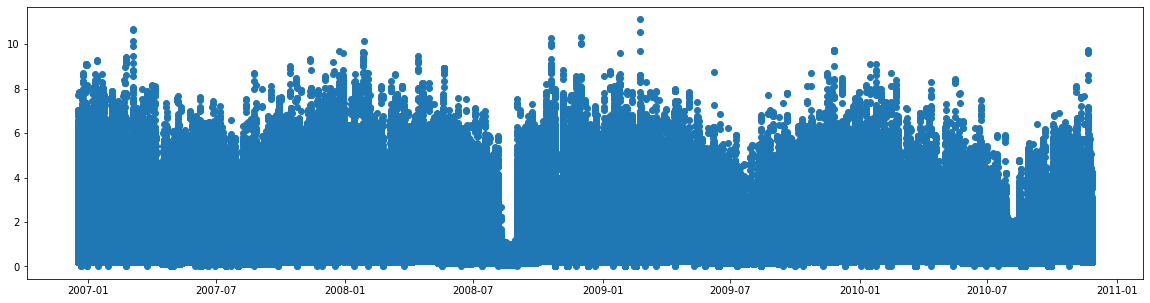

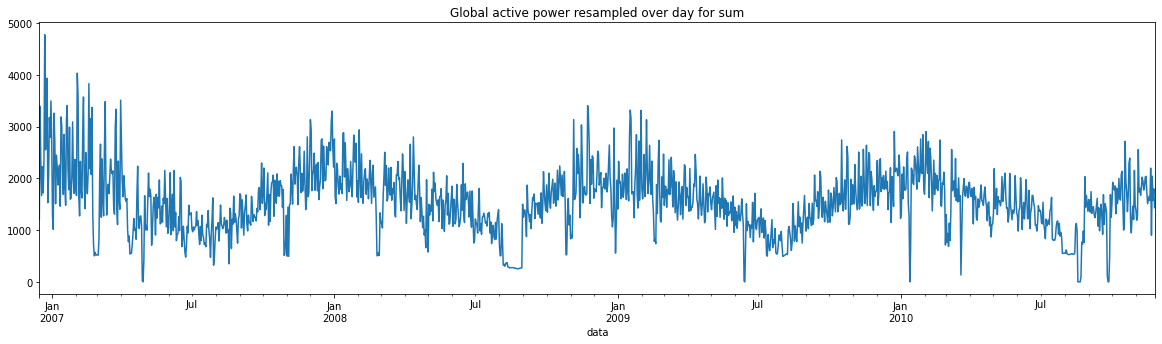

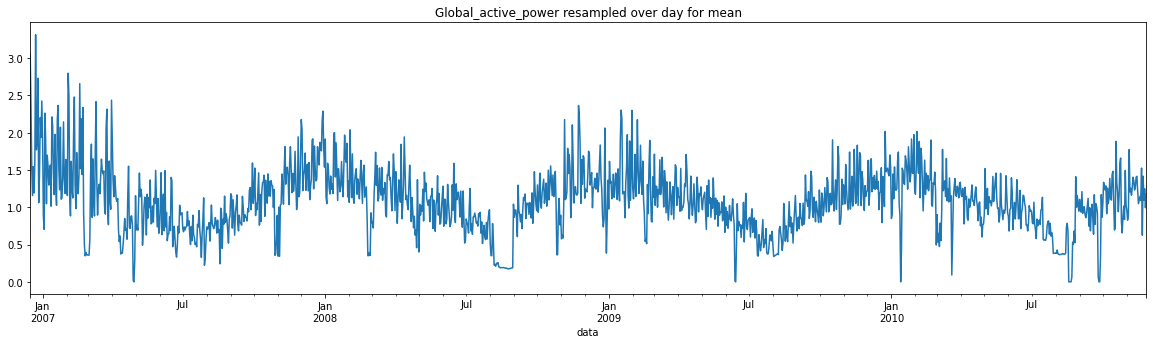

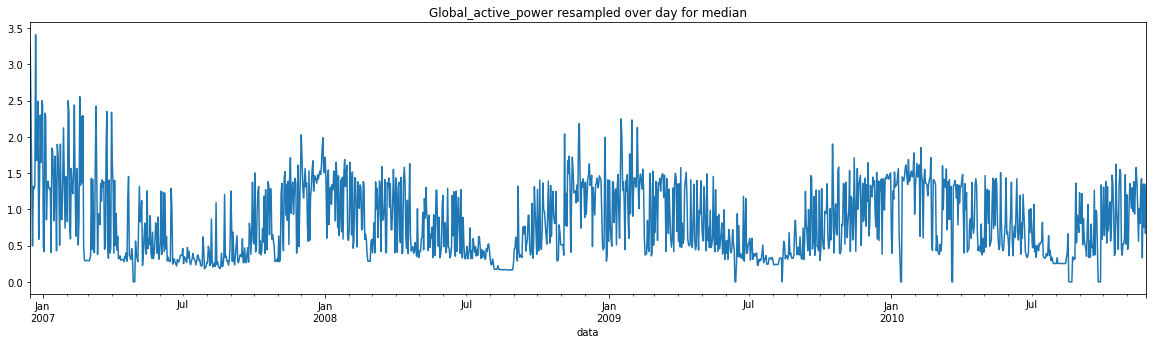

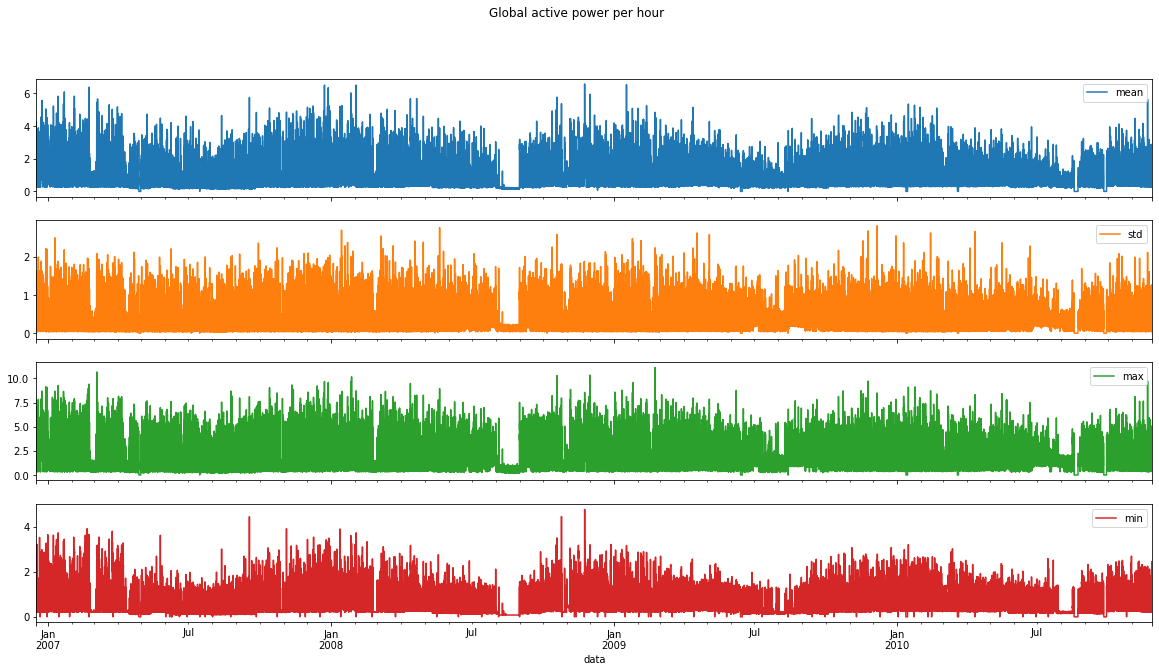

In [9]:
# Scatter plot de Global active power
plt.figure(figsize=(20, 5))
plt.scatter(df.index, df['Global_active_power'])
plt.show()

# Global active power resampled over day for sum
plt.figure(figsize=(20, 5))
df.Global_active_power.resample('D').sum().plot(title='Global active power resampled over day for sum')
plt.show()

# Global active power resampled over day for mean
plt.figure(figsize=(20, 5))
df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean')
plt.show()

# Global active power resampled over day for median
plt.figure(figsize=(20, 5))
df.Global_active_power.resample('D').median().plot(title='Global_active_power resampled over day for median')
plt.show()

# Global active power per hour
h = df.Global_active_power.resample('h').agg(['mean', 'std', 'max', 'min'])
h.plot(subplots=True, figsize=(20, 10), title='Global active power per hour')
plt.show()

In [10]:
#h = df.Global_active_power.resample('h').agg(['mean', 'std', 'max', 'min'])
#h.plot(subplots=True, figsize=(20, 10), title='Global active power per hour')
#plt.show()


semi_month = df.resample('SM').sum()

#semi_month = df.groupby(pd.Grouper(key='data',freq='SM')).sum()

semi_month.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2006-12-15,38319.086,2738.584,4964322.15,161907.4,27460.0,48365.0,156449.0
2006-12-31,34631.598,3090.090,5195625.78,146660.6,19277.0,36935.0,144051.0
2007-01-15,35510.708,2797.170,5557860.77,150298.0,37156.0,36736.0,176977.0
2007-01-31,34341.684,2543.752,5194277.02,144951.6,29936.0,40371.0,172991.0
2007-02-15,23990.180,2110.472,4499760.38,101281.0,17648.0,29843.0,110362.0


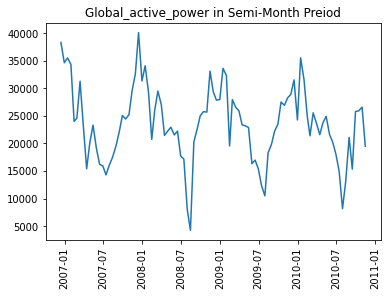

In [11]:
plt.plot(semi_month['Global_active_power'],linestyle = '-')
plt.xticks(rotation=90)
plt.title ('Global_active_power in Semi-Month Preiod')
# plt.legend()
plt.show()

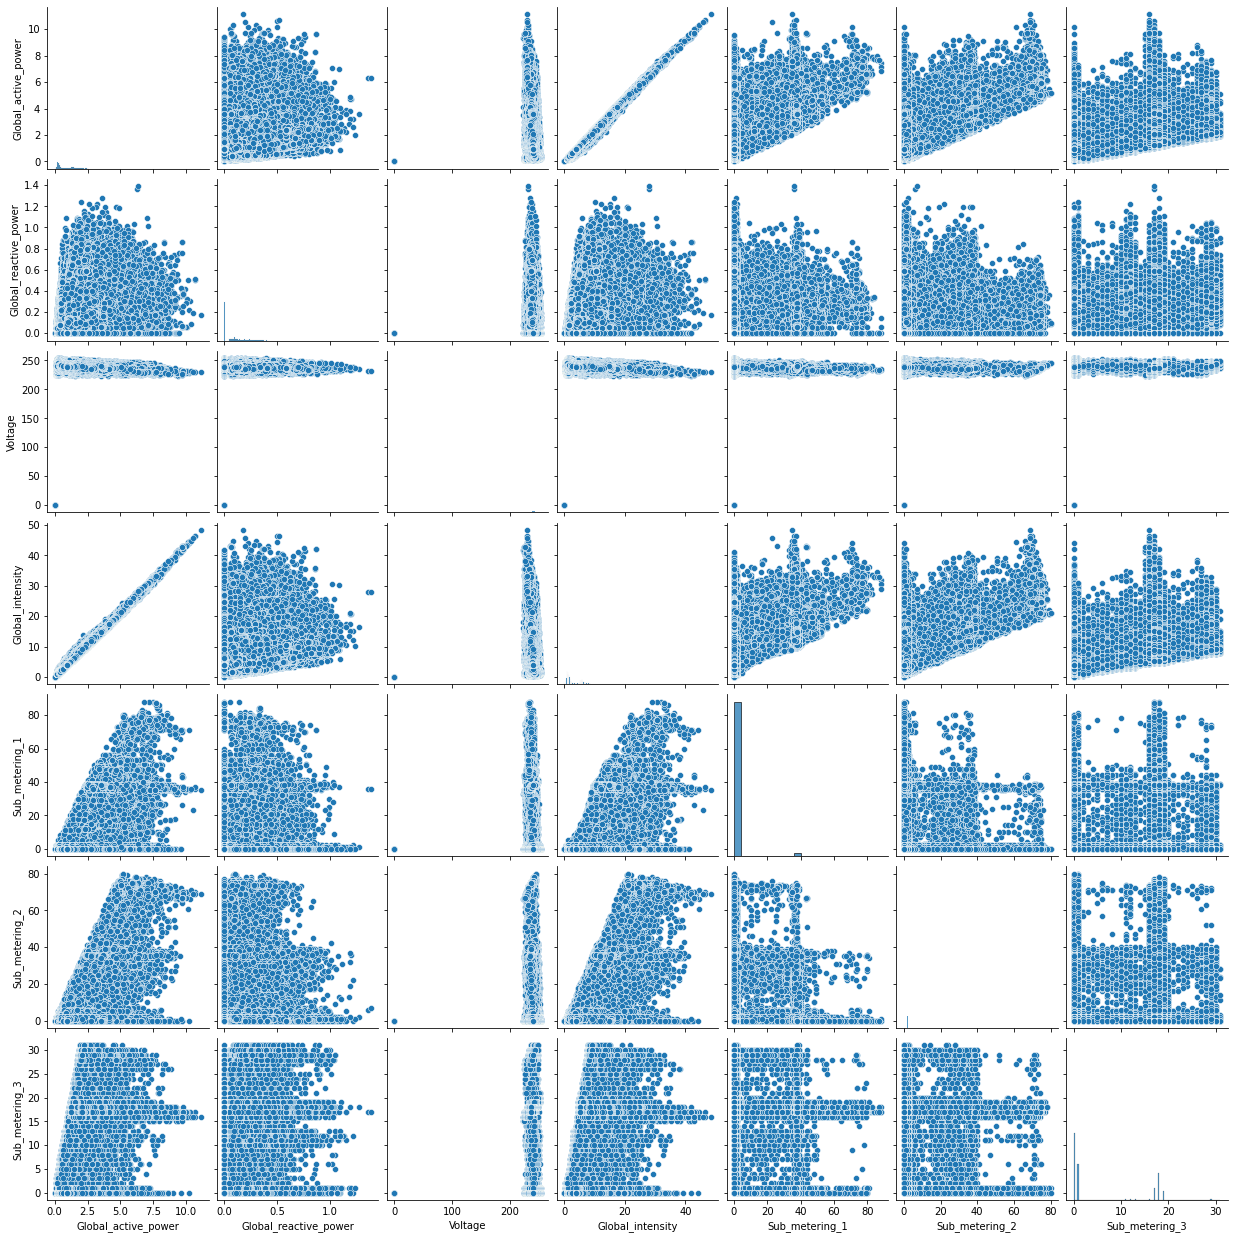

In [12]:
sns.pairplot(df)

<AxesSubplot:>

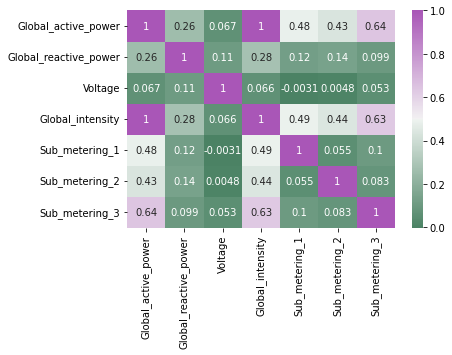

In [13]:
# Correlation matrix
MC = df.corr()
color_pattern = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.heatmap(MC, annot=True, cmap=color_pattern)

# Autocorrelation for seasonality analysis

<AxesSubplot:xlabel='data'>

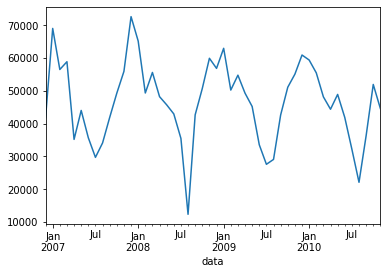

In [14]:
# Month resampling
month_data = df.resample('M').sum()
month_data['Global_active_power'].plot()

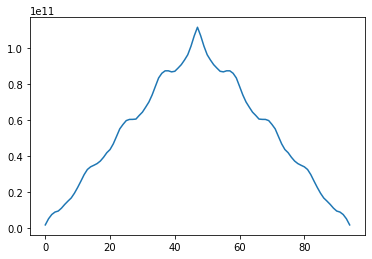

In [15]:
# Autocorrelation
autocorrelation = np.correlate(month_data['Global_active_power'], month_data['Global_active_power'], mode='full')

plt.plot(autocorrelation)

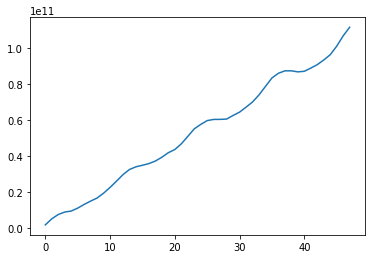

In [16]:
# We omited the second half because it does not give more information
half_autocorrelation = autocorrelation[: int(np.ceil(len(autocorrelation)/2))]
plt.plot(half_autocorrelation)

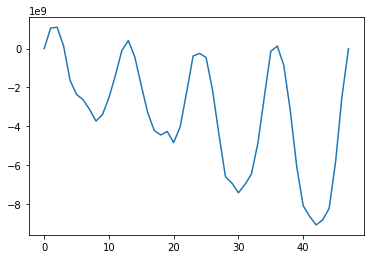

In [17]:
# We correct the linear factor of the autocorrelation to delete noise
step = (half_autocorrelation[-1] - half_autocorrelation[0]) / (len(half_autocorrelation) - 1)
linear_series = [half_autocorrelation[0]]

for e in range(len(half_autocorrelation) - 1):
    linear_series.append(linear_series[-1] + step)

linear_series = np.array(linear_series)
corrected_autocor = half_autocorrelation -  linear_series

plt.plot(corrected_autocor)

In [18]:
# Finding local maxima -> se proyectan los valores sobre el eje x
mean = np.mean(corrected_autocor)
local_maxima, _ = sp.find_peaks(corrected_autocor, height=mean)
differences = [(local_maxima[i]-local_maxima[i-1]) for i in range(1, len(local_maxima))]
np.mean(differences)
# This means cicle repeats every 12 months

11.333333333333334

# Forecasting (Prediction)

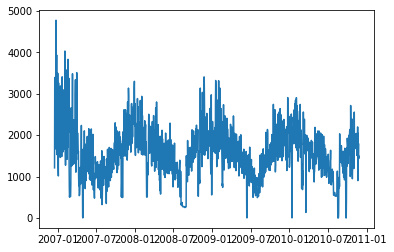

In [20]:
look_behind = 5
# Daily resampling
daily_data = df.resample('D').sum()
gap = daily_data['Global_active_power']
plt.plot(gap)

In [22]:
matrix = []

for i in range(len(gap)-look_behind):
    matrix.append(gap[i:(look_behind+i+1)])

matrix = np.array(matrix)
print(matrix)

[[1209.176 3390.46  2203.826 1666.194 2225.748 1716.624]
 [3390.46  2203.826 1666.194 2225.748 1716.624 2341.338]
 [2203.826 1666.194 2225.748 1716.624 2341.338 4773.386]
 ...
 [1570.4   2197.006  900.91  2041.536 1577.536 1796.248]
 [2197.006  900.91  2041.536 1577.536 1796.248 1431.164]
 [ 900.91  2041.536 1577.536 1796.248 1431.164 1488.104]]


In [44]:
# Normalization
min = np.min(matrix)
max = np.max(matrix)

normalize_matrix = (matrix + min) / (max - min)

long_data = len(gap)-look_behind

# Train-Test division
train = normalize_matrix[:int(np.ceil(long_data*0.8))]
test = normalize_matrix[int(np.ceil(long_data*0.8)):]

In [45]:
x_train = train[:,:look_behind]
y_train = train[:,look_behind]

x_test = test[:,:look_behind]
y_test = test[:,look_behind]

model = MLPRegressor((10,10,10), max_iter=5000)
model.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=5000)

In [47]:
p_train = model.predict(x_train)
p_test = model.predict(x_test)

# Mean squared error
train_error = np.mean(np.power(p_train - y_train, 2))
test_error = np.mean(np.power(p_test - y_test, 2))

print("Train MSE: ", train_error)
print("Test MSE: ", test_error)

Train MSE:  0.009963995736683851
Test MSE:  0.006835026235865308
